# Natural Gas Consumption
https://data.cityofnewyork.us/Environment/Natural-Gas-Consumption-by-ZIP-Code-2010/uedp-fegm

Natural gas consumption information is given by zipcode. Number of reported gas leaks and all socioeconomic data is given by census tracts (geoid). There is a way to find all census tracts in each zipcode area. But merging two datasets by geoid will be wrong, as some tracts belong to 2-3 zipcode areas. 

Another way to merge this data is by converting everything to neighborhoods (development name)


In [104]:
import pandas as pd
import numpy as np
import os

### Attempt 1 to merge natural gas consumtion table with the rest of the data (gas leaks, socioeconomic data)

In [105]:
data = pd.read_csv("https://www2.census.gov/geo/docs/maps-data/data/rel/zcta_tract_rel_10.txt")

In [106]:
data.head()

,ZCTA5,STATE,COUNTY,TRACT,GEOID,POPPT,HUPT,AREAPT,AREALANDPT,ZPOP,...,TRAREA,TRAREALAND,ZPOPPCT,ZHUPCT,ZAREAPCT,ZAREALANDPCT,TRPOPPCT,TRHUPCT,TRAREAPCT,TRAREALANDPCT
0,601,72,1,956300,72001956300,4271,1706,44663250,44572589,18570,...,44924558,44833897,23.00,22.03,26.67,26.74,98.5,98.33,99.42,99.42
1,601,72,1,956400,72001956400,2384,1037,32830481,32492074,18570,...,37782601,37191697,12.84,13.39,19.61,19.50,79.6,80.14,86.89,87.36
2,601,72,1,956500,72001956500,3126,1240,44969548,44809680,18570,...,44969548,44809680,16.83,16.01,26.85,26.89,100.0,100.00,100.00,100.00
3,601,72,1,956600,72001956600,2329,972,1981101,1981101,18570,...,1981101,1981101,12.54,12.55,1.18,1.19,100.0,100.00,100.00,100.00
4,601,72,1,956700,72001956700,2053,948,1380041,1380041,18570,...,1380041,1380041,11.06,12.24,0.82,0.83,100.0,100.00,100.00,100.00


In [107]:
data.columns = map(str.lower, data.columns)

In [108]:
len(data['geoid'].unique())

73596

In [109]:
columns = ['zcta5', 'geoid']
data = data[columns]

data['zip'] = data['zcta5'].astype('str').str.zfill(5)
data['geoid'] = data['geoid'].astype('str').str.zfill(11)
data.head()

,zcta5,geoid,zip
0,601,72001956300,00601
1,601,72001956400,00601
2,601,72001956500,00601
3,601,72001956600,00601
4,601,72001956700,00601


In [110]:
data = data[['geoid', 'zip']]

In [111]:
gas_data = pd.read_csv('C:\\Users\\mskac\\machineLearning\\GasLeakConEd\\data\\processed\\important_(used_in_app)\\Merged_asc_fdny_data.csv')

In [112]:
gas_data.head()

,Unnamed: 0,%housh_grandp_resp_for_grandch,avg_houshold_size,avg_year_built,gas_leaks,gas_leaks_per_person,geoid,incident_year,lonely_housholder%,lonely_housholder_over65%,mean_houshold_income,median_age,nonfamily_housholds%,not_us_citizen%,total_housing_units,unemployed%,vacant_housing_units%
0,0,9.576837,3.60,1953.839431,2,0.000412,36005000200,2013,18.040089,11.210097,72652.0,34.5,19.005197,11.198024,1476,8.5,8.7
1,1,4.164290,3.04,1972.667364,5,0.000936,36005000400,2013,13.519681,7.187678,80733.0,35.2,18.881917,7.821856,1912,5.7,8.3
2,2,1.748072,2.55,1969.786833,11,0.002109,36005001600,2013,33.470437,13.984576,44609.0,39.2,34.035990,15.819751,2043,6.6,4.8
3,3,0.000000,2.60,1966.332772,3,0.001171,36005001900,2013,35.499398,2.406739,42285.0,30.5,44.645006,24.863388,891,18.5,6.7
4,4,6.241611,2.84,1953.933724,42,0.004967,36005002000,2013,28.624161,12.953020,34044.0,35.9,29.798658,9.425260,3161,13.5,5.7


In [113]:
for column in data.columns:
    data[column] = pd.to_numeric(data[column])

In [114]:
merged = gas_data.merge(data, on='geoid')
merged.head()

,Unnamed: 0,%housh_grandp_resp_for_grandch,avg_houshold_size,avg_year_built,gas_leaks,gas_leaks_per_person,geoid,incident_year,lonely_housholder%,lonely_housholder_over65%,mean_houshold_income,median_age,nonfamily_housholds%,not_us_citizen%,total_housing_units,unemployed%,vacant_housing_units%,zip
0,0,9.576837,3.60,1953.839431,2,0.000412,36005000200,2013,18.040089,11.210097,72652.0,34.5,19.005197,11.198024,1476,8.5,8.7,10473
1,2019,5.946338,3.69,1956.357627,4,0.000785,36005000200,2014,14.575780,8.846991,75015.0,36.6,15.445975,10.951914,1475,7.7,6.5,10473
2,5497,6.526468,3.91,1957.304960,4,0.000740,36005000200,2015,16.316171,7.541697,77789.0,37.3,18.564177,11.937812,1492,7.7,7.6,10473
3,6942,4.883546,3.94,1958.662180,6,0.001143,36005000200,2016,16.078137,5.785124,80621.0,38.6,19.233659,12.873738,1486,6.8,10.4,10473
4,7944,3.028009,3.82,1964.495222,11,0.002175,36005000200,2017,17.335352,5.677517,73687.0,39.6,23.315670,17.694741,1465,12.4,9.8,10473


In [115]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15534 entries, 0 to 15533
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15534 non-null  int64  
 1   %housh_grandp_resp_for_grandch  15525 non-null  float64
 2   avg_houshold_size               15513 non-null  float64
 3   avg_year_built                  15534 non-null  float64
 4   gas_leaks                       15534 non-null  int64  
 5   gas_leaks_per_person            15534 non-null  float64
 6   geoid                           15534 non-null  int64  
 7   incident_year                   15534 non-null  int64  
 8   lonely_housholder%              15525 non-null  float64
 9   lonely_housholder_over65%       15525 non-null  float64
 10  mean_houshold_income            15484 non-null  float64
 11  median_age                      15504 non-null  float64
 12  nonfamily_housholds%            

In [116]:
gas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11607 entries, 0 to 11606
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      11607 non-null  int64  
 1   %housh_grandp_resp_for_grandch  11604 non-null  float64
 2   avg_houshold_size               11595 non-null  float64
 3   avg_year_built                  11607 non-null  float64
 4   gas_leaks                       11607 non-null  int64  
 5   gas_leaks_per_person            11607 non-null  float64
 6   geoid                           11607 non-null  int64  
 7   incident_year                   11607 non-null  int64  
 8   lonely_housholder%              11604 non-null  float64
 9   lonely_housholder_over65%       11604 non-null  float64
 10  mean_houshold_income            11577 non-null  float64
 11  median_age                      11590 non-null  float64
 12  nonfamily_housholds%            

We can see that resulting table has many more records that the original gas leaks table, because some geoids were matched with several zipcodes.

### Attempt 2

Now I will try to reprocess the FDNY files with #gas leaks, and  retreive information by zipcode

In [472]:
dir_path = os.path.dirname(os.path.abspath("__file__"))
df_original1 = pd.read_csv(r'C:\Users\mskac\Desktop\Incidents_Responded_to_by_Fire_Companies.csv', low_memory=False)
df_locations1 = pd.read_csv(dir_path + '\..\data\original\In_Service_Alarm_Box_Locations.csv', low_memory=False)

# filter out only gas leaks data out of all FDNY calls (incidents file1)
df_incidents1 = df_original1[df_original1.INCIDENT_TYPE_DESC == "412 - Gas leak (natural gas or LPG)"]
df_incidents1.columns = map(str.lower, df_incidents1.columns)
df_incidents1.info()
df_incidents1.to_csv(r'C:\Users\mskac\machineLearning\GasLeakConEd\data\processed\Gas_Leak_Incidents_Responded_to_by_Fire_Companies.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119324 entries, 3 to 2518753
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   im_incident_key               119324 non-null  int64  
 1   fire_box                      119322 non-null  object 
 2   incident_type_desc            119324 non-null  object 
 3   incident_date_time            119324 non-null  object 
 4   arrival_date_time             118636 non-null  object 
 5   units_onscene                 118636 non-null  float64
 6   last_unit_cleared_date_time   119324 non-null  object 
 7   highest_level_desc            119322 non-null  object 
 8   total_incident_duration       119324 non-null  float64
 9   action_taken1_desc            119324 non-null  object 
 10  action_taken2_desc            115132 non-null  object 
 11  action_taken3_desc            113241 non-null  object 
 12  property_use_desc             119323 non-nu

In [473]:
df_incidents1.groupby(df_incidents1.incident_date_time.str[6:10]).count()
df_incidents1 = df_incidents1[['fire_box','incident_type_desc','incident_date_time','units_onscene','total_incident_duration','property_use_desc','borough_desc', 'zip_code']]
df_incidents1 = df_incidents1.dropna()
df_incidents1.head()

,fire_box,incident_type_desc,incident_date_time,units_onscene,total_incident_duration,property_use_desc,borough_desc,zip_code
3,7412,412 - Gas leak (natural gas or LPG),01/01/2013 12:02:32 AM,4.0,2259.0,429 - Multifamily dwelling,5 - Queens,11103
159,4504,412 - Gas leak (natural gas or LPG),01/01/2013 01:53:19 AM,5.0,1495.0,"962 - Residential street, road or residential ...",5 - Queens,11354
175,3064,412 - Gas leak (natural gas or LPG),01/01/2013 02:07:29 AM,5.0,872.0,419 - 1 or 2 family dwelling,2 - Bronx,10460
226,3652,412 - Gas leak (natural gas or LPG),01/01/2013 02:47:57 AM,6.0,1346.0,419 - 1 or 2 family dwelling,4 - Brooklyn,11235
260,6180,412 - Gas leak (natural gas or LPG),01/01/2013 03:10:53 AM,6.0,1498.0,"962 - Residential street, road or residential ...",5 - Queens,11361


In [474]:
df_incidents1 = df_incidents1[['zip_code', 'borough_desc', 'fire_box','incident_date_time']]

We will be merging by the 'fire_box' column.
Df_locations 'fire_box' column has the following format: capital letter for the borough (B-Brooklyn, X-Bronx, M-Manhattan, Q- Queens, R- Staten Island)+ 4 digits of fire_box ID'. Example: 'B0012'
Df_incidents1 'fire_box' column only contains <= 4 digits of fire_box ID'. Example: 12
Df_incidents2 'fire_box_number' column only contains <=digits of fire_box ID'. Example: 12

Therefore, we need to make their formats the same

In [475]:
df_incidents1['fire_box'] = df_incidents1['fire_box'].str.zfill(4)
df_incidents1['boro_letter'] = df_incidents1['borough_desc'].apply(lambda x: 'B' if x[0] == '4' else 'M' if x[0] == '1' else 'X' if x[0] == '2' else 'Q' if x[0]=='5' else 'R')
df_incidents1['fire_box'] = df_incidents1.boro_letter + df_incidents1.fire_box
df_incidents1.drop(['boro_letter'], axis = 1, inplace = True)

In [476]:
df_incidents1.to_csv(dir_path + '\..\data\processed\FDNY_zip.csv')

In [477]:
df_locations2 = pd.read_csv(dir_path + '\..\data\original\Fire_Boxes.csv', low_memory=False)
df_locations2.head()

,longitude,latitude,fire_box,address
0,-73.93253,40.72795,B0014,Gardner Ave & Meeker Ave
1,-73.93146,40.72563,B0015,Gardner Ave & Cherry St
2,-73.93622,40.72748,B0018,Bridgewater St & Varick St
3,-73.95612,40.72601,B0020,Meserole Ave & Banker St
4,-73.95865,40.73626,B0023,Commercial St & Clay St


In [478]:
df_merged = pd.merge(df_incidents1, df_locations2, how='inner', on = 'fire_box')
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114992 entries, 0 to 114991
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   zip_code            114992 non-null  object 
 1   borough_desc        114992 non-null  object 
 2   fire_box            114992 non-null  object 
 3   incident_date_time  114992 non-null  object 
 4   longitude           114992 non-null  float64
 5   latitude            114992 non-null  float64
 6   address             114992 non-null  object 
dtypes: float64(2), object(5)
memory usage: 7.0+ MB


In [479]:
df_locations2.head()

,longitude,latitude,fire_box,address
0,-73.93253,40.72795,B0014,Gardner Ave & Meeker Ave
1,-73.93146,40.72563,B0015,Gardner Ave & Cherry St
2,-73.93622,40.72748,B0018,Bridgewater St & Varick St
3,-73.95612,40.72601,B0020,Meserole Ave & Banker St
4,-73.95865,40.73626,B0023,Commercial St & Clay St


In [480]:
df_merged_2013_2018 = df_merged

In [481]:
df_merged_2013_2018.head()

,zip_code,borough_desc,fire_box,incident_date_time,longitude,latitude,address
0,11103,5 - Queens,Q7412,01/01/2013 12:02:32 AM,-73.91579,40.75754,Broadway && 44th St
1,11103,5 - Queens,Q7412,04/20/2013 11:43:06 AM,-73.91579,40.75754,Broadway && 44th St
2,11103,5 - Queens,Q7412,08/13/2013 06:03:48 AM,-73.91579,40.75754,Broadway && 44th St
3,11103,5 - Queens,Q7412,01/03/2014 12:04:59 PM,-73.91579,40.75754,Broadway && 44th St
4,11103,5 - Queens,Q7412,03/12/2014 04:19:44 PM,-73.91579,40.75754,Broadway && 44th St


In [482]:
df_merged_2013_2018.to_csv(dir_path + '\..\data\processed\FDNY_zip.csv')


In [517]:
df_incidents_carto2013_2018 =  pd.read_csv(dir_path + '\\..\\data\\processed\\fdny_zip_carto.csv')

In [518]:
df_incidents_carto2013_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114983 entries, 0 to 114982
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   the_geom            114983 non-null  object 
 1   cartodb_id          114983 non-null  int64  
 2   field_1             114983 non-null  int64  
 3   zip_code            114983 non-null  int64  
 4   borough_desc        114983 non-null  object 
 5   fire_box            114983 non-null  object 
 6   incident_date_time  114983 non-null  object 
 7   longitude           114983 non-null  float64
 8   latitude            114983 non-null  float64
 9   address             114983 non-null  object 
 10  ntaname             114983 non-null  object 
 11  boroname            114983 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 10.5+ MB


In [519]:
df_incidents_carto2013_2018 = df_incidents_carto2013_2018.dropna()
df_incidents_carto2013_2018 = df_incidents_carto2013_2018[['zip_code', 'incident_date_time', 'ntaname', 'boroname']]

In [520]:
df_incidents_carto2013_2018.to_csv(dir_path + '\..\data\processed\FDNY_zip.csv')

In [521]:
df_incidents_carto2013_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114983 entries, 0 to 114982
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   zip_code            114983 non-null  int64 
 1   incident_date_time  114983 non-null  object
 2   ntaname             114983 non-null  object
 3   boroname            114983 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.4+ MB


In [526]:
# natural gas data given only for 2010, so we filter the closest - 2013 year
df_incidents_grouped = df_incidents_carto2013_2018[df_incidents_carto2013_2018['incident_date_time'].str[6:10] == '2013']

,zip_code,incident_date_time,ntaname,boroname
0,10461,03/20/2013 02:33:51 PM,Pelham Bay-Country Club-City Island,Bronx
1,10461,04/03/2013 12:02:23 PM,Pelham Bay-Country Club-City Island,Bronx
2,10461,04/17/2013 10:10:02 AM,Pelham Bay-Country Club-City Island,Bronx
5,10464,06/13/2013 09:12:09 PM,Pelham Bay-Country Club-City Island,Bronx
6,10464,12/05/2013 03:11:51 PM,Pelham Bay-Country Club-City Island,Bronx
...,...,...,...,...
114875,11209,12/01/2013 02:13:58 PM,Bay Ridge,Brooklyn
114876,11209,12/11/2013 01:12:11 PM,Bay Ridge,Brooklyn
114886,11209,12/02/2013 03:12:21 PM,Bay Ridge,Brooklyn
114891,11209,12/17/2013 02:19:21 PM,Bay Ridge,Brooklyn


In [523]:
df_incidents_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13472 entries, 0 to 114894
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   zip_code            13472 non-null  int64 
 1   incident_date_time  13472 non-null  object
 2   ntaname             13472 non-null  object
 3   boroname            13472 non-null  object
dtypes: int64(1), object(3)
memory usage: 526.2+ KB


In [524]:
df_incidents_grouped = df_incidents_carto2013_2018.groupby('zip_code').agg({'incident_date_time': 'count'}).reset_index()
df_incidents_grouped.rename(columns={'incident_date_time': 'gas_leaks'}, inplace = True)

In [527]:
df_incidents_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   zip_code   177 non-null    int64
 1   gas_leaks  177 non-null    int64
dtypes: int64(2)
memory usage: 2.9 KB


In [528]:
df_incidents_grouped.to_csv(dir_path + '\..\data\processed\FDNY_zip.csv')

In [537]:
nat_gas = pd.read_csv(dir_path + r'\..\data\original\Natural_Gas_Consumption.csv')
nat_gas = nat_gas[['Zip Code', ' Consumption (therms) ']]
nat_gas = nat_gas.dropna()
nat_gas['Zip Code'] = nat_gas['Zip Code'].astype('str').str.slice(stop=5)
nat_gas['Zip Code'] = nat_gas['Zip Code'].astype('int64')
nat_gas = nat_gas.groupby('Zip Code').agg({' Consumption (therms) ': 'sum'}).reset_index()


In [538]:
merge1 = pd.merge(df_incidents_grouped,nat_gas,left_on='zip_code', right_on='Zip Code')
merge1['gas_leaks/gas_consumed']=merge1['gas_leaks']/merge1[' Consumption (therms) ']

In [539]:
merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 173
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   zip_code                174 non-null    int64  
 1   gas_leaks               174 non-null    int64  
 2   Zip Code                174 non-null    int64  
 3    Consumption (therms)   174 non-null    float64
 4   gas_leaks/gas_consumed  174 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 8.2 KB


In [540]:
import geopandas
import geoplot
from shapely import wkt

In [541]:
zip_shapefile = 'https://raw.githubusercontent.com/fedhere/PUI2015_EC/master/mam1612_EC/nyc-zip-code-tabulation-areas-polygons.geojson'
zip_shape = geopandas.read_file(zip_shapefile)
zip_shape['postalCode'] = zip_shape['postalCode'].astype('int64')
merged = pd.merge(zip_shape, merge1, left_on='postalCode', right_on='zip_code')
merged.head()

,OBJECTID,postalCode,PO_NAME,STATE,borough,ST_FIPS,CTY_FIPS,BLDGpostalCode,Shape_Leng,Shape_Area,@id,geometry,zip_code,gas_leaks,Zip Code,Consumption (therms),gas_leaks/gas_consumed
0,1,11372,Jackson Heights,NY,Queens,36,081,0,20624.692317,2.016328e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.86942 40.74916, -73.89507 40.746...",11372,441,11372,21151023.0,0.000021
1,2,11004,Glen Oaks,NY,Queens,36,081,0,23002.816039,2.260653e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.71068 40.75004, -73.70869 40.748...",11004,181,11004,8302352.0,0.000022
2,4,11426,Bellerose,NY,Queens,36,081,0,35932.810639,4.941836e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.72270 40.75373, -73.72251 40.753...",11426,364,11426,4992632.0,0.000073
3,5,11365,Fresh Meadows,NY,Queens,36,081,0,38693.565676,6.938587e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.81089 40.72717, -73.81116 40.728...",11365,661,11365,11465999.0,0.000058
4,6,11373,Elmhurst,NY,Queens,36,081,0,33755.870988,4.265940e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.88722 40.72753, -73.88723 40.728...",11373,467,11373,25549355.0,0.000018


In [542]:
merged['gas_leaks/gas_consumed'] = merged['gas_leaks/gas_consumed']*1000

## Gas_leaks/Gas_consumed

<AxesSubplot:>

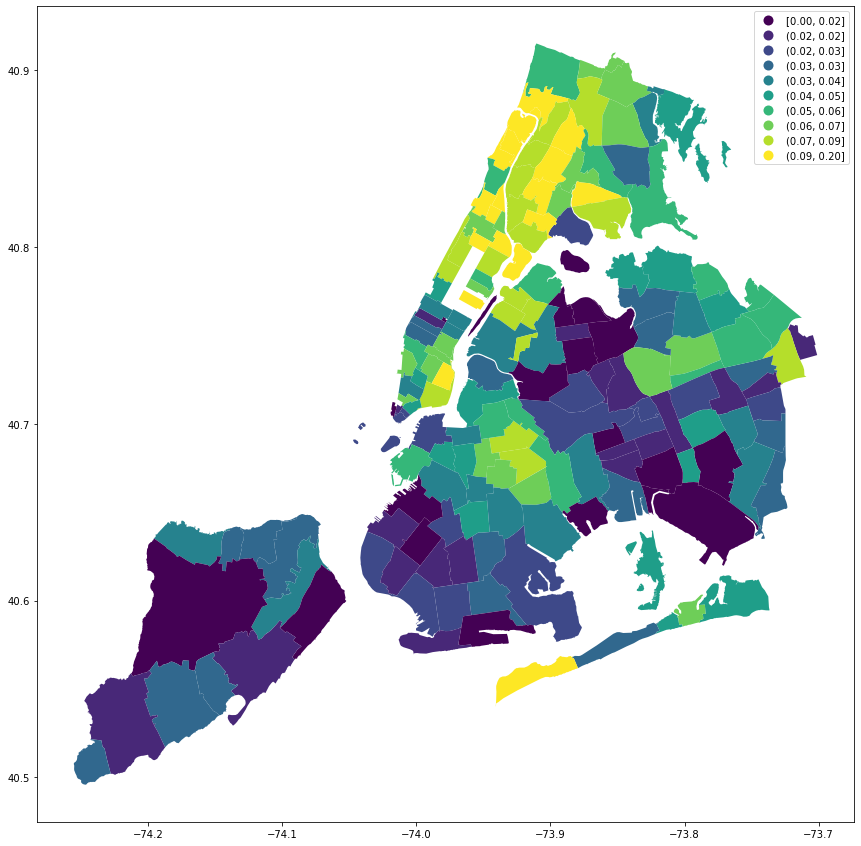

In [543]:
import mapclassify
import matplotlib.pyplot as plt


merged.plot(column="gas_leaks/gas_consumed",
            
            legend=True,
            scheme="quantiles",
            k=10,
            figsize=(15, 15)
            )
# 'gas_leaks/gas_consumed' was multiplied by 1000

## Gas Leaks

<AxesSubplot:>

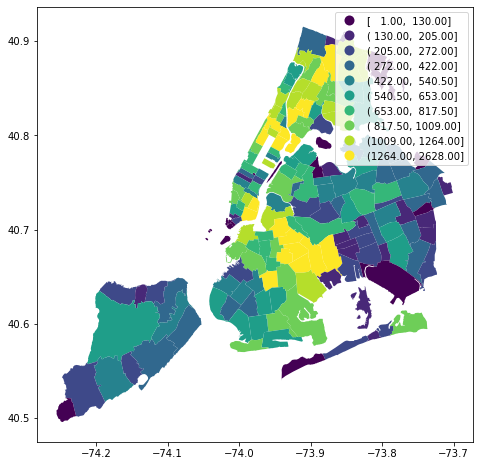

In [544]:
merged.plot(column="gas_leaks",
            
            legend=True,
            scheme="quantiles",
            k=10,
            figsize=(8, 8)
            )

<AxesSubplot:>

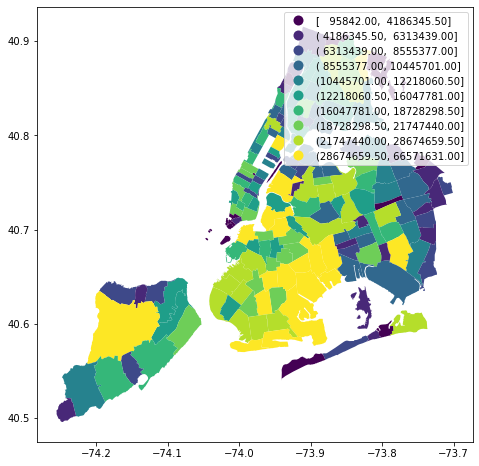

In [545]:
merged.plot(column=' Consumption (therms) ',
            
            legend=True,
            scheme="quantiles",
            k=10,
            figsize=(8, 8)
            )

In [546]:
merged.columns

Index(['OBJECTID', 'postalCode', 'PO_NAME', 'STATE', 'borough', 'ST_FIPS',
       'CTY_FIPS', 'BLDGpostalCode', 'Shape_Leng', 'Shape_Area', '@id',
       'geometry', 'zip_code', 'gas_leaks', 'Zip Code',
       ' Consumption (therms) ', 'gas_leaks/gas_consumed'],
      dtype='object')

## Correlation: Reported gas leaks vs. Consumption of natural gas (by zipcode)

Note: this result is not exact, as we analyzed gas leaks data from 2013, and natuarl gas consumption from 2010

In [548]:
# correlation

corr_data = merged[['gas_leaks',' Consumption (therms) ']]
corr_data['gas_leaks'].corr(corr_data[' Consumption (therms) '])

0.4968537244872336

In [557]:
cooking_gas = pd.read_csv(dir_path + '\..\data\original\Cooking_Gas_Consumption.csv')
cooking_gas.head()

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,Service End Date,# days,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (Therms),ES Commodity,Underlying Utility
0,ALBANY II,BROOKLYN,ALBANY/ALBANY II,ALBANY II BLD 09,AMR,NaN,85,524,K008500,FEDERAL,...,01/27/2020,32.0,904846.0,N,295.16,T1A TRAN RES N-Ht,Yes,399.45,UTILITY GAS,NatGrid NYC
1,ALBANY II,BROOKLYN,ALBANY/ALBANY II,ALBANY II BLD 09,AMR,NaN,85,524,K008500,FEDERAL,...,01/27/2020,32.0,924103.0,N,71.11,T1A TRAN RES N-Ht,Yes,96.24,UTILITY GAS,NatGrid NYC
2,ALBANY,BROOKLYN,ALBANY/ALBANY II,ALBANY II BLD 07,AMR,NaN,31,524,K003100,FEDERAL,...,02/25/2020,29.0,152644.0,N,276.07,T1A TRAN RES N-Ht,Yes,371.88,UTILITY GAS,NatGrid NYC
3,ALBANY,BROOKLYN,ALBANY/ALBANY II,ALBANY BLD 03,AMR,NaN,31,524,K003100,FEDERAL,...,02/25/2020,29.0,379350.0,N,0.00,T1A TRAN RES N-Ht,Yes,0.00,UTILITY GAS,NatGrid NYC
4,ALBANY,BROOKLYN,ALBANY/ALBANY II,ALBANY BLD 04,AMR,NaN,31,524,K003100,FEDERAL,...,02/25/2020,29.0,463027.0,N,93.82,T1A TRAN RES N-Ht,Yes,126.38,UTILITY GAS,NatGrid NYC


In [558]:
cooking_gas['Development Name'].unique()

array(['ALBANY II', 'ALBANY', '45 ALLEN STREET', 'AMSTERDAM',
       'AMSTERDAM ADDITION', '830 AMSTERDAM AVENUE', 'ARMSTRONG I',
       'ARMSTRONG II', 'ASTORIA', 'ATLANTIC TERMINAL SITE 4B', 'AUDUBON',
       'BAILEY AVENUE-WEST 193RD STREET', 'BAISLEY PARK', 'BARUCH',
       'BARUCH HOUSES ADDITION', 'BAY VIEW', 'BAYCHESTER',
       'BEACH 41ST STREET-BEACH CHANNEL DRIVE',
       'BEDFORD-STUYVESANT REHAB', 'BELMONT-SUTTER AREA', 'BERRY',
       'BERRY STREET-SOUTH 9TH STREET', 'BETHUNE GARDENS', 'BLAND',
       'BORINQUEN PLAZA I', 'BORINQUEN PLAZA II', 'BOSTON ROAD PLAZA',
       'BOSTON SECOR', 'BOULEVARD', 'BOYNTON AVENUE REHAB',
       'BRACETTI PLAZA', 'BREUKELEN', 'BREVOORT', 'BRONX RIVER',
       'BRONX RIVER ADDITION', 'BROWN', 'BROWNSVILLE',
       'BRYANT AVENUE-EAST 174TH STREET', 'BUSHWICK',
       'BUSHWICK II (GROUPS A & C)', 'BUSHWICK II (GROUPS B & D)',
       'BUSHWICK II CDA (GROUP E)', 'BUTLER', 'CAMPOS PLAZA II',
       'CAREY GARDENS', 'CARLETON MANOR', 'CASSID

In [559]:
heating_gas = pd.read_csv(dir_path+'\..\data\original\Heating_Gas_Consumption_And_Cost.csv')
heating_gas.head()

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,Service End Date,# days,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (Therms),ES Commodity,Underlying Utility
0,ADAMS,BRONX,ADAMS,BLD 04,NONE,BLD 1-7,118.0,248,B011800,FEDERAL,...,01/26/2010,33.0,3299599,N,78292.97,Trans Res MultiDwell Heat Dual,Yes,136632.00,UTILITY GAS,ConEd
1,ADAMS,BRONX,ADAMS,BLD 04,Not Applicable,NaN,118.0,248,B011800,FEDERAL,...,01/26/2010,32.0,3.95416E+14,N,133779.54,NaN,Yes,136632.00,BROKERED GAS,ConEd
2,ALBANY/ALBANY II,BROOKLYN,ALBANY/ALBANY II,ALBANY BLD 04,AMR,BLD 1-6,31.0,524,K003100,FEDERAL,...,01/28/2010,30.0,08372362-66.8%,N,44335.21,T3 Tran Mult Fam,Yes,153899.18,UTILITY GAS,NatGrid NYC
3,ALBANY/ALBANY II,BROOKLYN,ALBANY/ALBANY II,ALBANY BLD 04,AMR,BLD 7-9,85.0,524,K008500,FEDERAL,...,01/28/2010,30.0,08372362-33.2%,N,22034.86,T3 Tran Mult Fam,Yes,76488.82,UTILITY GAS,NatGrid NYC
4,ALBANY/ALBANY II,BROOKLYN,ALBANY/ALBANY II,ALBANY BLD 04,Not Applicable,NaN,31.0,524,K003100,FEDERAL,...,01/28/2010,29.0,0298920000-66.8%,NaN,150694.30,NaN,Yes,0.00,BROKERED GAS,NatGrid NYC


In [560]:
heating_gas['Development Name'].unique()

array(['ADAMS', 'ALBANY/ALBANY II', 'ALLEN STREET', 'AMSTERDAM',
       'AMSTERDAM AVENUE', 'ARMSTRONG I', 'ARMSTRONG II', 'ASTORIA',
       'ATLANTIC TERMINAL SITE 4B', 'AUDUBON',
       'BAILEY AVENUE-WEST 193RD STREET', 'BAISLEY PARK',
       'BARUCH/BARUCH HOUSES ADDITION', 'BAY VIEW', 'BAYCHESTER',
       'BEDFORD-STUYVESANT REHAB', 'BELMONT-SUTTER AREA', 'BERRY',
       'BERRY STREET-SOUTH 9TH STREET', 'BETANCES I', 'BETANCES II',
       'BETANCES II (BLD 1)', 'BETANCES II (BLD 2)/BETANCES III (BLD 6)',
       'BETANCES II (BLD 3)/BETANCES III (BLD 4-5)',
       'BETANCES II (BLD 4)', 'BETANCES III', 'BETANCES III (BLD 2-3)',
       'BETANCES IV', 'BETANCES IV (BLD 1-2,4,6-8)', 'BETANCES V',
       'BETANCES V (BLD 2)/BETANCES IV (BLD 3,5)', 'BETANCES VI',
       'BETHUNE GARDENS', 'BLAND', 'BORINQUEN PLAZA I',
       'BORINQUEN PLAZA II', 'BOSTON ROAD PLAZA', 'BOSTON SECOR',
       'BOULEVARD', 'BOYNTON AVENUE REHAB', 'BRACETTI PLAZA', 'BREUKELEN',
       'BREVOORT', 'BRONX RIVE

In [561]:
heating_gas = heating_gas[heating_gas['TDS #'].notna()]
heating_gas['TDS #'] = heating_gas['TDS #'].astype('int64')
cooking_gas = cooking_gas[cooking_gas['TDS #'].notna()]

In [563]:
heating_gas = heating_gas[heating_gas['Service End Date'].str[6:10] == '2010']
cooking_gas = cooking_gas[cooking_gas['Service End Date'].str[6:10] == '2010']

In [564]:
heating_gas = heating_gas.groupby('TDS #').agg({'Consumption (Therms)':'sum'}).reset_index()
cooking_gas = cooking_gas.groupby('TDS #').agg({'Consumption (Therms)':'sum'}).reset_index()

In [568]:
merged_cook_heat = pd.merge(heating_gas, cooking_gas, on = 'TDS #')
merged_cook_heat.head()

,TDS #,Consumption (Therms)_x,Consumption (Therms)_y
0,2,3022112.00,7603.21
1,3,1130933.08,146821.37
2,4,2653693.56,159361.88
3,5,1444550.00,68596.71
4,6,2549113.97,114241.43


In [569]:
merged_cook_heat.rename(columns={'Consumption (Therms)_x': 'heating_therms', 'Consumption (Therms)_y': 'cooking_therms'}, inplace = True)

In [570]:
merged_cook_heat.head()

,TDS #,heating_therms,cooking_therms
0,2,3022112.00,7603.21
1,3,1130933.08,146821.37
2,4,2653693.56,159361.88
3,5,1444550.00,68596.71
4,6,2549113.97,114241.43


In [571]:
corr_data = merged_cook_heat[['heating_therms','cooking_therms']]
corr_data['heating_therms'].corr(corr_data['cooking_therms'])

0.7875161765697435